In [6]:
from torchvision import transforms

net1_data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(64),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor()
        
    ]),
    'val': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
    
    'test': transforms.Compose([
        transforms.Resize(64),
        transforms.Grayscale(),
        transforms.ToTensor(),
    ]),
}

Creating Net1.
x:0	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:32	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:64	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:96	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:128	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:160	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:192	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:224	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:256	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:288	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:320	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:352	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:384	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnota

x:160	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:192	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:224	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:256	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:288	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:320	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:352	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:384	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:416	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:448	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:480	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:512	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:544	y:0	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False

x:896	y:448	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:928	y:448	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:0	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:32	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:64	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:96	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:128	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:160	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:192	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:224	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:256	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:288	y:480	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:320	y:480	width:64	height:64	text:	confidence:1.0	level

x:704	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:736	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:768	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:800	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:832	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:864	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:896	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:928	y:864	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:0	y:896	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:32	y:896	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:64	y:896	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:96	y:896	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:128	y:896	width:64	height:64	text:	confidence:1.0	level

x:608	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:640	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:672	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:704	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:736	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:768	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:800	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:832	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:864	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:896	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:928	y:1248	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:0	y:1280	width:64	height:64	text:	confidence:1.0	level:2	isAnnotation:False
x:32	y:1280	width:64	height:64	text:	confi

x:448	y:1056	width:64	height:64	text:	confidence:-0.5453886985778809	level:2	isAnnotation:True
x:544	y:1056	width:64	height:64	text:	confidence:-0.2375655323266983	level:2	isAnnotation:True
x:576	y:1056	width:64	height:64	text:	confidence:-0.03694221377372742	level:2	isAnnotation:True
x:736	y:1056	width:64	height:64	text:	confidence:-0.008969396352767944	level:2	isAnnotation:True
x:768	y:1056	width:64	height:64	text:	confidence:-0.35031479597091675	level:2	isAnnotation:True
x:320	y:1088	width:64	height:64	text:	confidence:-0.00014314490545075387	level:2	isAnnotation:True
x:416	y:1088	width:64	height:64	text:	confidence:-0.3587949275970459	level:2	isAnnotation:True
x:480	y:1088	width:64	height:64	text:	confidence:-0.08437555283308029	level:2	isAnnotation:True
x:512	y:1088	width:64	height:64	text:	confidence:-0.3679679036140442	level:2	isAnnotation:True
x:544	y:1088	width:64	height:64	text:	confidence:-0.16411110758781433	level:2	isAnnotation:True
x:608	y:1088	width:64	height:64	text:	co

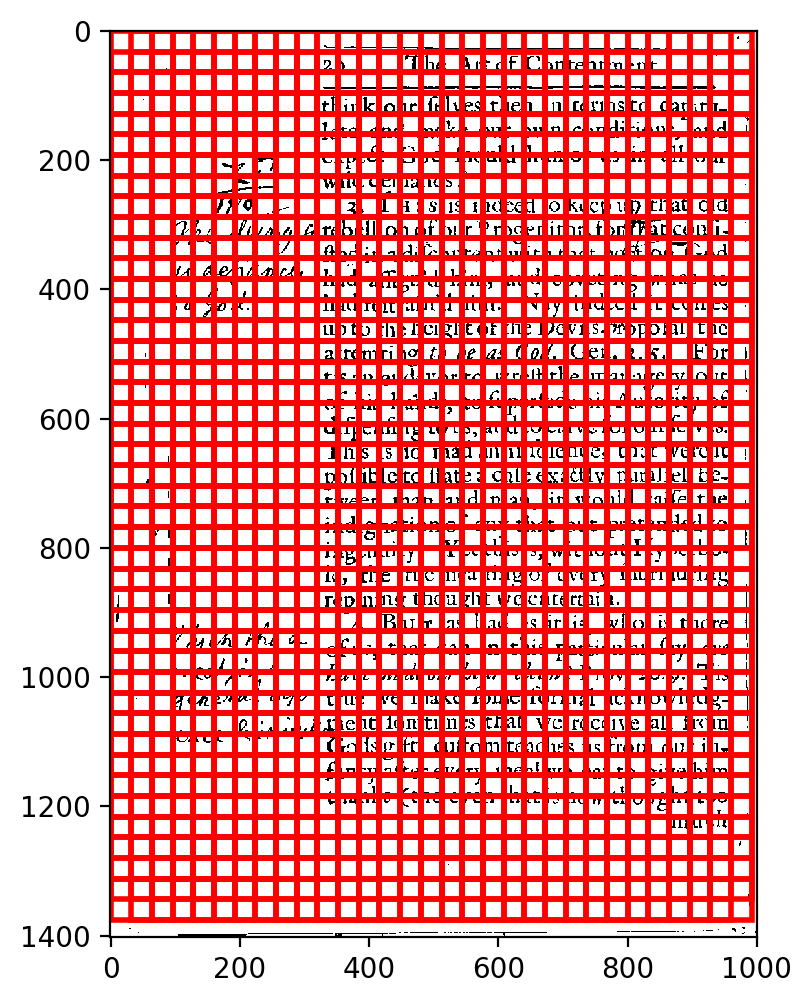

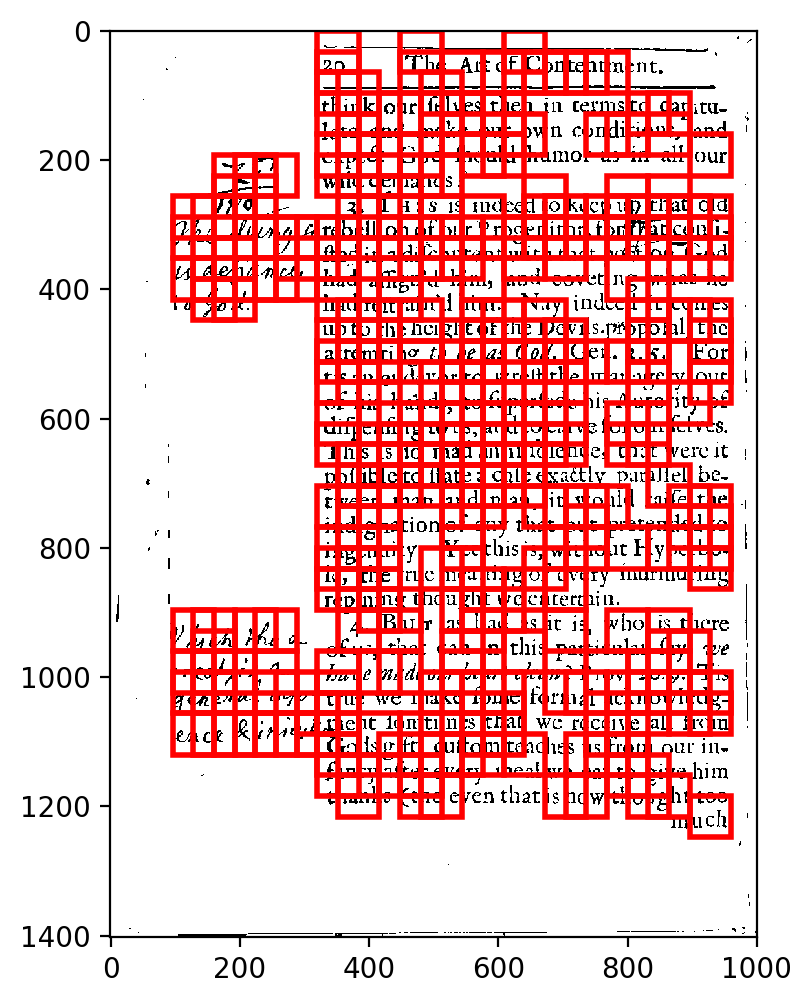

In [7]:

import sys
import os
sys.path.append(os.path.abspath('../../../'))
from detection.lib.model.ImageROI import ImageROI
from PIL import Image
import numpy as np
import torch

# book_data_dir = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images'
# img_loc = book_data_dir + '/Dryden/positive/307.png'
# Testing with image of dimensions 1000x1381

img_loc = '/home/rahul/data/printed_with_ids_harsh_filter/books-preprocessed-images/Allestree/positive/1307.png'
pilimg = Image.open(img_loc)
w, h = pilimg.size
imgrois = [ImageROI(0, 0, w, h)]
imgarr = np.asarray(pilimg)

from model_utils import create_model_architecture
from bounding_box_classification import get_pos_rois
# net1 = Net1()
net1 = create_model_architecture('net1', use_gpu = False)
# net1.load_state_dict(torch.load('models/net1-IAM-1.pt'))
net1.load_state_dict(torch.load('models/net1-aa_64-1.pt'))


# Modify this as necessary
# imgrois = [ImageROI(0, 0, 1000, 700), ImageROI(0, 750, 1000, 500)]
net1.train(False)
with torch.set_grad_enabled(False):
    pos_rois = get_pos_rois(net1,
                            (img_loc, imgrois),
                            model_transform = net1_data_transforms['test'],
                            model_input_size = (64,64),
                            stride=(32, 32))

# for rois in pos_rois:
#     for roi in rois:
#         print(roi.toString())
        
all_rois = [roi for rois in pos_rois for roi in rois]
    
print('number of pos ROIs found', len(all_rois))

# from detection.lib.ImgProcessor import ImgProcessor
from detection.lib.utils.Utils import plt_img
# plot the rois and plot only certain information according to the set
# imgProcessor = ImgProcessor()
# img = imgProcessor.loadImage(inFilename=img_loc)
# roi_level_set = set([1])
plt_img(imgarr, rois=[(all_rois, 'r')])#, roi_level_set=roi_level_set)

In [8]:
print("done plotting regions of interest")

done plotting regions of interest
